<a href="https://colab.research.google.com/github/MarlaLorrani18/Desafio---Horus-/blob/main/desafio_horus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Pacotes
import pandas as pd
import seaborn as srn
import numpy as np

In [6]:
#importando a base de dados
desafio = pd.read_excel("dados_desafio.xlsx")

A base de dados contém 27 variáveis e 117.171 pedidos relacionadas a informações de vendas de produtos de uma determinada empresa em 2016, 2017 e 2018.

In [8]:
#tamanho da base de dados
desafio.shape

(117171, 28)

Analisando os clientes, temos que no período estudado a empresa atendeu a 97.802 clientes diferentes.

In [9]:
len(desafio["cliente_id"].unique())

97802

A empresa teve 114.705 pedidos entregues, 1.164 pedidos enviados, 553 cancelados, 370 em processamento, 369 faturados, 7 indisponíveis e 3 aprovados.

In [10]:
status_pedido_agrupado = desafio.groupby(['status_pedido']).size()
status_pedido_agrupado.sort_values(ascending=False)

status_pedido
delivered      114705
shipped          1164
canceled          553
processing        370
invoiced          369
unavailable         7
approved            3
dtype: int64

Analisando o preço dos produtos vendidos, temos que: o preço mínimo foi de 0,85, o preço máximo de 6.735,00. O preço médio é de 120,52, enquanto a mediana tem um valor de 74,90, indicando uma assimetria positiva, ou seja, há mais produtos vendidos com preços muito altos, puxando a média para cima. 25% dos itens vendidos tinham preços de até 39,90 e 75% preços até 134,20.

In [11]:
desafio['preco'].describe().round(2)

count    117171.00
mean        120.52
std         183.02
min           0.85
25%          39.90
50%          74.90
75%         134.20
max        6735.00
Name: preco, dtype: float64

O boxplot abaixo, além das interpretações dadas acima, expõe uma quantidade significativa de outliers.

Text(0.5, 1.0, 'preco')

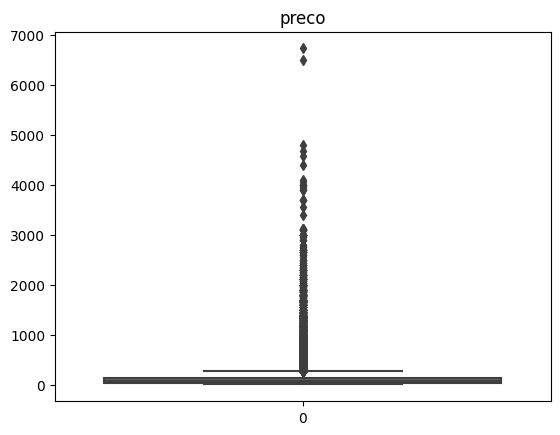

In [12]:
srn.boxplot(desafio['preco']).set_title('preco')

Quanto ao frete da entrega, o valor mínimo foi de 0,00 (entrega grátis), o máximo de 409,68, o valor médio do frete foi de 20,03, enquanto a médiana foi de 16,28, também indicando uma assimetria positiva, ou seja, fretes mais altos puxando a média para cima. 25% dos fretes custavam até 13,08, e 75% até 21,18.

In [13]:
desafio['valor_frete'].describe().round(2)

count    117171.00
mean         20.03
std          15.83
min           0.00
25%          13.08
50%          16.28
75%          21.18
max         409.68
Name: valor_frete, dtype: float64

Em relação ao valor do frete, também é possível identificar uma quantidade significativa de outliers, além das interpretações acima.

Text(0.5, 1.0, 'valor_frete')

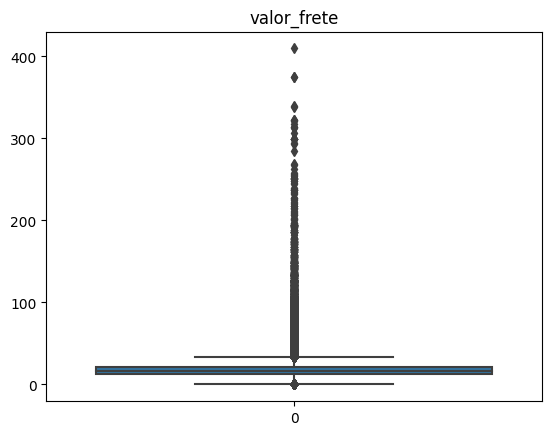

In [14]:
srn.boxplot(desafio['valor_frete']).set_title('valor_frete')

O tipo de pagamento mais frequente foi o cartão de crédito, seguido pelo boleto, voucher e cartão de débito.

In [15]:
tipo_pagamento_agrupado = desafio.groupby(['tipo_pagamento']).size()
tipo_pagamento_agrupado.sort_values(ascending=False)

tipo_pagamento
credit_card    86406
boleto         22802
voucher         6271
debit_card      1692
dtype: int64

<Axes: xlabel='tipo_pagamento'>

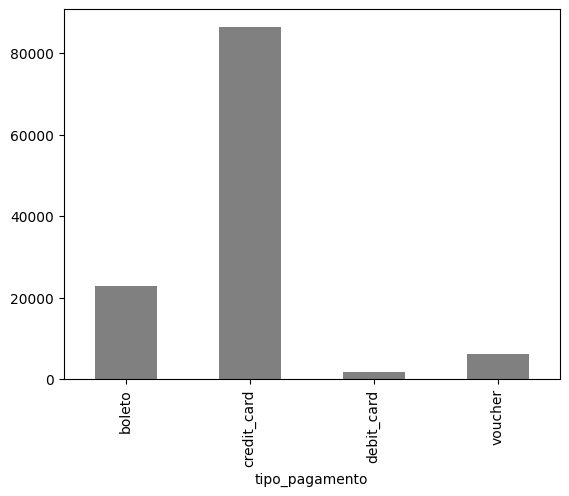

In [16]:
tipo_pagamento_agrupado.plot.bar(color = ['gray'])

71,50% dos pedidos tiveram pagamentos de 1 a 3 prestações.

In [17]:
pagamento_prestacoes_agrupado = desafio.groupby(['pagamento_prestacoes']).size()
pagamento_prestacoes_agrupado.sort_values(ascending=False)

pagamento_prestacoes
1     58429
2     13631
3     11712
4      7945
10     6830
5      5998
8      5058
6      4607
7      1819
9       713
12      164
15       91
18       38
24       34
11       22
20       20
13       19
14       16
16        7
17        7
21        6
0         3
22        1
23        1
dtype: int64

O valor do pagamento variou de 0,00 até 13.664,08, em média foi de 172,00, e 50% dos clientes pagaram até 108,10. Também apresentando assimetria positiva.

In [18]:
desafio['pagamento_valor'].describe().round(2)

count    117171.00
mean        172.00
std         265.42
min           0.00
25%          60.73
50%         108.10
75%         189.00
max       13664.08
Name: pagamento_valor, dtype: float64

Analisando visualmente, também é possível indicar a presença de outliers.

Text(0.5, 1.0, 'pagamento_valor')

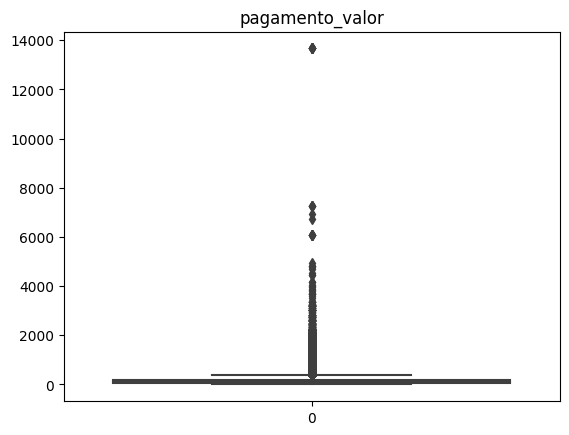

In [19]:
srn.boxplot(desafio['pagamento_valor']).set_title('pagamento_valor')

Quanto ao score de avaliação, 66.192 clientes avaliaram com nota 5, 22.254 com nota 4 e 28.725 com notas abaixo de 4.

In [20]:
score_avaliacao_agrupado = desafio.groupby(['score_avaliacao']).size()
score_avaliacao_agrupado.sort_values(ascending=False)

score_avaliacao
5    66192
4    22254
1    14825
3     9821
2     4079
dtype: int64

<Axes: xlabel='score_avaliacao'>

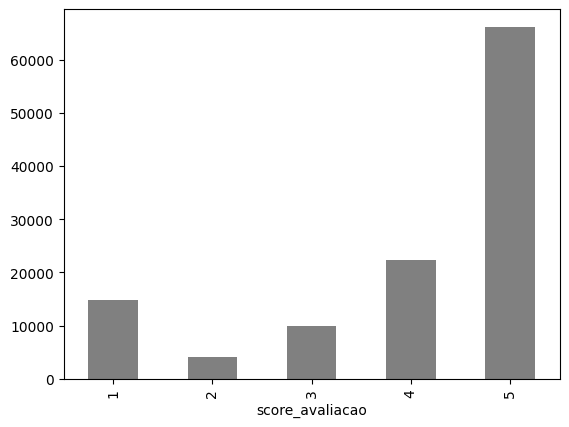

In [21]:
score_avaliacao_agrupado.plot.bar(color = 'gray')

Os clientes que mais compraram são dos estado de São Paulo (49.457), seguido por clientes do Rio de Janeiro (15.192) e Minas Gerais (13.597). Os cinco estados com menos compras foram: Rondônia, Amazonas, Acre, Amapá e Roraima, todos da região Norte do país.

In [22]:
estado_cliente_agrupado = desafio.groupby(['estado_cliente']).size()
estado_cliente_agrupado.sort_values(ascending=False)

estado_cliente
SP    49457
RJ    15192
MG    13597
RS     6500
PR     5956
SC     4274
BA     4011
DF     2479
GO     2416
ES     2317
PE     1875
CE     1545
MT     1117
PA     1101
MS      852
MA      842
PB      629
PI      568
RN      566
AL      459
SE      395
TO      338
RO      285
AM      170
AC       95
AP       83
RR       52
dtype: int64

Em relação ao estado do vendedor, as maiores frequências estão no estado de São Paulo, Minas Gerais e Paraná. E as menores em Pará, Amazonas e Acre, ainda estados da Região Norte.

In [23]:
estado_vendedor_agrupado = desafio.groupby(['estado_vendedor']).size()
estado_vendedor_agrupado.sort_values(ascending=False)

estado_vendedor
SP    83513
MG     9228
PR     9029
RJ     4991
SC     4240
RS     2272
DF      948
BA      698
GO      547
PE      461
MA      403
ES      385
MT      147
CE      103
MS       59
RN       56
PB       43
RO       14
PI       12
SE       10
PA        8
AM        3
AC        1
dtype: int64

Abaixo estão, em ordem de avaliação do pedido, os vendedores que apresentaram as notas mais altas até os vendedores com as notas mais baixas.

In [24]:
novo_banco = desafio.groupby(['id_vendedor']).agg({'score_avaliacao': 'mean'}).reset_index()

In [25]:
novo_banco.sort_values(by = "score_avaliacao", ascending=False)

,id_vendedor,score_avaliacao
2345,c3251e13f1bbda6c74e37c160f991e19,5.0
2930,f3041c2e75ec683697a6a5ea82192210,5.0
524,2c9005d8043aff18b8557ffb7b13cda4,5.0
2633,da3fede3469bf49b7293ce3fc45b294d,5.0
1525,7c4402417d51474d4d0cda9557340e40,5.0
...,...,...
2961,f5403d3f50089112c4eed37928b7f622,1.0
423,244b04680fdbded0acf5aebd9c92b44a,1.0
1434,749e7cdabbaf72f16677859e27874ba5,1.0
2655,dc120d932ddf9d4dfb6fd68beefda622,1.0


Os clientes de São Paulo gastaram na empresa no período estudado 5.434.348,00. Os clientes do estado que menos compraram foram os de Roraima.

In [26]:
novo_banco3 = desafio.groupby(['estado_cliente']).agg({'preco': 'sum'}).reset_index()
novo_banco3.sort_values(by = "preco", ascending=False)

,estado_cliente,preco
25,SP,5434348.54
18,RJ,1888584.36
10,MG,1628816.26
22,RS,787493.10
17,PR,705950.26
4,BA,538172.64
23,SC,528528.02
6,DF,312812.50
8,GO,309392.61
7,ES,271960.34


De acordo com os estados dos vendedores da empresa, São Paulo foi o que apresentou maior faturamento, sendo de 9.071.074,91, e o menor foi o estado do Acre, com um saldo de 267,00.

In [27]:
novo_banco4 = desafio.groupby(['estado_vendedor']).agg({'preco': 'sum'}).reset_index()
novo_banco4.sort_values(by = "preco", ascending=False)

,estado_vendedor,preco
22,SP,9071074.91
15,PR,1318949.69
8,MG,1051823.63
16,RJ,864738.84
20,SC,659820.16
19,RS,391488.72
2,BA,319231.69
4,DF,106686.59
13,PE,96703.14
6,GO,69767.54


Recategorizando a variável "categorias", de acordo com a similaridade dos produtos.

In [28]:
# Recategorizando

desafio.loc[desafio['categoria'].isin(['alimentos','alimentos_bebidas','bebidas']), 'categorias_2'] = "alimentos"
desafio.loc[desafio['categoria'].isin(['artes','artes_e_artesanato','artigos_de_festas', 'artigos_de_natal']),
            'categorias_2'] = "artes_decoracao"
desafio.loc[desafio['categoria'].isin(['consoles_games',
                                       'eletronicos', 'informatica_acessorios',
                                       'pc_gamer', 'pcs', 'tablets_impressao_imagem',
                                       'telefonia', ]), 'categorias_2'] = "eletronicos"
desafio.loc[desafio['categoria'].isin(['audio', 'cds_dvds_musicais', 'dvds_blu_ray', 'musica']), 'categorias_2'] = "musica"
desafio.loc[desafio['categoria'].isin(['casa_construcao', 'construcao_ferramentas_construcao',
                                       'construcao_ferramentas_ferramentas', 'construcao_ferramentas_iluminacao',
                                       'construcao_ferramentas_jardim', 'construcao_ferramentas_seguranca',
                                       'ferramentas_jardim']), 'categorias_2'] = "construcao_ferramentas"
desafio.loc[desafio['categoria'].isin(['eletrodomesticos','eletrodomesticos_2','eletroportateis',
                                       'portateis_casa_forno_e_cafe', 'portateis_cozinha_e_preparadores_de_alimentos',
                                       'utilidades_domesticas']), 'categorias_2'] = "casa_eletrodomesticos"
desafio.loc[desafio['categoria'].isin(['beleza_saude','fashion_bolsas_e_acessorios','fashion_calcados',
                                       'fashion_esporte', 'fashion_roupa_feminina', 'fashion_roupa_infanto_juvenil',
                                       'fashion_roupa_masculina', 'fashion_underwear_e_moda_praia',
                                       'fraldas_higiene', 'perfumaria']), 'categorias_2'] = "beleza_higiene"
desafio.loc[desafio['categoria'].isin(['alimentos','alimentos_bebidas','bebidas']), 'categorias_2'] = "alimentos"
desafio.loc[desafio['categoria'].isin(['casa_conforto','casa_conforto_2', 'moveis_colchao_e_estofado',
                                       'moveis_cozinha_area_de_servico_jantar_e_jardim',
                                       'moveis_decoracao', 'moveis_escritorio', 'moveis_quarto', 'moveis_sala']),
            'categorias_2'] = "moveis_casa"
desafio.loc[desafio['categoria'].isin(['agro_industria_e_comercio','cine_foto','climatizacao',
                                       'flores', 'industria_comercio_e_negocios', 'instrumentos_musicais',
                                       'la_cuisine', 'malas_acessorios', 'market_place', 'seguros_e_servicos',
                                       'sinalizacao_e_seguranca', '']), 'categorias_2'] = "outros"
desafio.loc[desafio['categoria'].isin(['livros_importados','livros_interesse_geral','livros_tecnicos']),
            'categorias_2'] = "livros"
desafio.loc[desafio['categoria'].isin(['automotivo']), 'categorias_2'] = "automotivo"
desafio.loc[desafio['categoria'].isin(['bebes']), 'categorias_2'] = "bebes"
desafio.loc[desafio['categoria'].isin(['brinquedos']), 'categorias_2'] = "brinquedos"
desafio.loc[desafio['categoria'].isin(['cool_stuff']), 'categorias_2'] = "cool_stuff"
desafio.loc[desafio['categoria'].isin(['esporte_lazer']), 'categorias_2'] = "esporte_lazer"
desafio.loc[desafio['categoria'].isin(['papelaria']), 'categorias_2'] = "papelaria"
desafio.loc[desafio['categoria'].isin(['pet_shop']), 'categorias_2'] = "pet_shop"
desafio.loc[desafio['categoria'].isin(['relogios_presentes']), 'categorias_2'] = "relogios_presentes"
desafio.loc[desafio['categoria'].isin(['cama_mesa_banho']), 'categorias_2'] = "cama_mesa_banho"

In [29]:
categorias_2_agrupado = desafio.groupby(['categorias_2']).size()
categorias_2_agrupado.sort_values(ascending=False)

categorias_2
eletronicos               17058
beleza_higiene            16346
moveis_casa               12006
cama_mesa_banho           11768
casa_eletrodomesticos      9214
esporte_lazer              8942
construcao_ferramentas     6989
relogios_presentes         6161
automotivo                 4355
brinquedos                 4246
cool_stuff                 3964
outros                     3340
bebes                      3178
papelaria                  2607
pet_shop                   2020
alimentos                  1185
livros                      892
musica                      501
artes_decoracao             435
dtype: int64

Estudando as variáveis de tempo, selecionamos os pedidos com horas completas (com data e horário não nulos). A variável tempo de entrega foi criada com o tempo da entrega estimada menos a hora do pedido.

In [ ]:
df_horas = desafio.dropna(subset = ['data_hora_pedido','pedido_aprovado',
                               'pedido_com_entregador','pedido_entregue',
                               'estimada_entrega'])

df_horas['data_hora_pedido'] = pd.to_datetime(df_horas['data_hora_pedido'], format="%Y-%m-%d %H:%M:%S")
df_horas['pedido_aprovado'] = pd.to_datetime(df_horas['pedido_aprovado'], format="%Y-%m-%d %H:%M:%S")
df_horas['pedido_com_entregador'] = pd.to_datetime(df_horas['pedido_com_entregador'], format="%Y-%m-%d %H:%M:%S")
df_horas['pedido_entregue'] = pd.to_datetime(df_horas['pedido_entregue'], format="%Y-%m-%d %H:%M:%S")
df_horas['estimada_entrega'] = pd.to_datetime(df_horas['estimada_entrega'], format="%Y-%m-%d %H:%M:%S")

df_horas['tempo_de_entrega'] = df_horas['estimada_entrega']-df_horas['data_hora_pedido']



Em relação ao tempo de entrega, foram feitas duas analises com as categorias de produtos, com a variável inicial e com a variável recategorizada. Com as categorias iniciais (tendo um total de 73 divisões), movéis de escritório apresentavam o maior tempo até a entrega, 31 dias, e o menor tempo era da classe de arte e artesanato, 11 dias. Após a recategorização, moveis da casa passaram a ter o meior tempo de entrega, 25 dias, e alimentos, o menor, 20 dias.

In [31]:
df_horas[['categoria','tempo_de_entrega']].groupby(by = ['categoria']).mean().sort_values(by = "tempo_de_entrega",
ascending=False)

,tempo_de_entrega
categoria,
moveis_escritorio,31 days 19:13:28.370709382
seguros_e_servicos,31 days 09:59:38.500000
fashion_calcados,29 days 10:08:01.761194030
cds_dvds_musicais,26 days 20:19:23.642857143
artigos_de_natal,26 days 14:41:10.586206896
...,...
alimentos,18 days 20:42:38.226640159
livros_importados,18 days 14:44:10.406779661
pc_gamer,18 days 13:27:49


In [32]:
df_horas[['categorias_2','tempo_de_entrega']].groupby(by = ['categorias_2']).mean().sort_values(by = "tempo_de_entrega",
ascending=False)

,tempo_de_entrega
categorias_2,
moveis_casa,25 days 14:16:54.049817223
eletronicos,24 days 07:35:34.126784215
construcao_ferramentas,24 days 03:01:53.767397660
cool_stuff,24 days 02:40:38.988674388
papelaria,24 days 01:36:04.253030895
relogios_presentes,23 days 21:04:37.750580431
cama_mesa_banho,23 days 19:29:14.011803222
artes_decoracao,23 days 18:16:06.930787589
outros,23 days 14:26:22.698194062


Analisando o preço médio das vendas por categoria, antes da recategorização, a classe de produtos com maior média de preços foi "pcs", 1.078,56, e a menor "casa_conforto_2". De acordo com a recategorização, "relogios e presentes" apresentaram a maior média de 202,20, e a menor média foi da categoria "Alimentos", 26,23.

In [33]:
novo_banco5 = desafio.groupby(['categoria']).agg({'preco': 'mean'}).reset_index()
novo_banco5.sort_values(by = "preco", ascending=False).round(2)

,categoria,preco
61,pcs,1078.56
64,portateis_casa_forno_e_cafe,627.51
29,eletrodomesticos_2,459.57
0,agro_industria_e_comercio,332.71
45,instrumentos_musicais,290.76
...,...,...
6,artigos_de_natal,54.84
17,cds_dvds_musicais,52.14
42,fraldas_higiene,40.19
41,flores,32.27


In [34]:
novo_banco6 = desafio.groupby(['categorias_2']).agg({'preco': 'mean'}).reset_index()
novo_banco6.sort_values(by = "preco", ascending=False).round(2)

,categorias_2,preco
18,relogios_presentes,202.20
15,outros,178.15
9,cool_stuff,165.44
2,automotivo,139.76
3,bebes,135.72
14,musica,131.04
8,construcao_ferramentas,125.28
7,casa_eletrodomesticos,122.13
4,beleza_higiene,117.36
5,brinquedos,116.82


Estudando a quantidade de compra de "pcs" por estado do cliente, temos que houveram 68 compras por clientes em São Paulo, sendo o estado com maior quantidade, e o estado com menor número de clientes que compraram "pcs" foram Acre, Mato Grosso do Sul, Amapá, Amazonas, Tocantins, com 1 compra.

In [35]:
teste = desafio[desafio["categoria"]=="pcs"]
teste.groupby(['estado_cliente']).agg({'categoria': 'count'}).sort_values(by = "categoria", ascending=False).round(2)

,categoria
estado_cliente,
SP,68
BA,25
RJ,23
MG,20
PE,10
CE,7
DF,7
GO,7
RS,7


In [36]:
novo_banco8 = desafio.groupby(['categorias_2']).agg({'preco': 'mean'}).reset_index()
novo_banco8.sort_values(by = "preco", ascending=False).round(2)

,categorias_2,preco
18,relogios_presentes,202.20
15,outros,178.15
9,cool_stuff,165.44
2,automotivo,139.76
3,bebes,135.72
14,musica,131.04
8,construcao_ferramentas,125.28
7,casa_eletrodomesticos,122.13
4,beleza_higiene,117.36
5,brinquedos,116.82
